In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import io
import pandas as pd

data = files.upload()

Saving student-mat.csv to student-mat.csv


In [ ]:
df = pd.read_csv(io.StringIO(data['student-mat.csv'].decode('utf-8')))

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
plt.style.use('fivethirtyeight')
sns.set_style('white')

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV, train_test_split
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 91 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   college            499 non-null    object
 1   Branch             499 non-null    object
 2   Gender             499 non-null    object
 3   age                499 non-null    int64 
 4   address            499 non-null    object
 5   Nation             499 non-null    object
 6   famsize            499 non-null    object
 7   firstchild         499 non-null    object
 8   siblings           499 non-null    object
 9   Pstatus            499 non-null    object
 10  PrelationQ         499 non-null    int64 
 11  Medu               499 non-null    int64 
 12  Fedu               499 non-null    int64 
 13  Mjob               499 non-null    object
 14  Fjob               499 non-null    object
 15  famincome          499 non-null    int64 
 16  Povertyline        499 non-null    object
 1

In [ ]:
df["college"].value_counts()


KVG    262
VC     169
BIT     68
Name: college, dtype: int64

In [ ]:
drop_features = ["college","Branch","Nation"]

data = df.drop(labels=drop_features, axis=1)

In [ ]:
def ordinal_encode(series, categories):
  encoder = OrdinalEncoder(categories=categories, dtype=np.int64)
  return encoder.fit_transform(series.values.reshape(-1, 1))

In [ ]:
categories_ordenc = {"Gender": [["F", "M"]],
                     "address": [["R", "U"]],
                     "famsize": [["LE3", "GT3"]],
                     "firstchild": [["no","yes"]],
                     "siblings": [["no","yes"]],
                     "Povertyline": [["above","below"]],
                     "houstatus": [["no","yes"]],
                     "workstatus": [["no","yes"]],
                     "PermAdd": [["no","yes"]],
                     "Pstatus": [['A', 'T']],
                     "schoolsup": [["no", "yes"]],
                     "famsup": [["no", "yes"]],
                     "paid": [["no", "yes"]],
                     "activities": [["no", "yes"]],
                     "nursery": [["no", "yes"]],
                     "higher": [["no", "yes"]],
                     "PCathome": [["no","yes"]],
                     "internet": [["no", "yes"]],
                     "romantic": [["no", "yes"]],
                   "Crimeact": [["no","yes"]],
                  "NcrimAct": [["no","yes"]],
                    "Harrasment": [["no","yes"]],
                     "Discrimnation": [["no","yes"]],
                     "lonlineess": [["no","yes"]],
                     "LangUsdTeacher": [["Kannada","English"]],
                     "PrerequistSkill": [["no","yes"]],
                     "GenofTeacher": [["F", "M"]],
                     "teachingMode": [["offline","online"]],
                     "Training": [["no","yes"]],
                     "CulturalAct": [["no","yes"]],
                     "ragging": [["no","yes"]],
                     "StressTimPresure": [["no","yes"]],
                     }

for column, category in categories_ordenc.items():
  data[column] = ordinal_encode(data[column], category)

In [ ]:
def onehot_encode(data, column, categories):
  encoder = OneHotEncoder(categories=categories, drop="first", sparse=False, dtype=np.int64)
  encoded_features = encoder.fit_transform(data[column].values.reshape(-1, 1))
  encoder.transform(data[column].values.reshape(-1, 1))

  data = data.drop(labels=column, axis=1)

  for j, category in enumerate(categories[0][1:]):
    category_column_name = "{}_{}".format(column, category)
    data[category_column_name] = encoded_features[:, j]

  return data

In [ ]:
categories_hotenc = {"Fjob": [["other" ,  "private" , "selfemployed" , "government", "business"]],
                     "Mjob": [["other" ,  "government", "selfemployed", "at_home","private"]],
                     "reasonforjoin": [["other", "home", "reputation", "course"]],
                     "guardian": [["other", "mother", "father"]]}

for column, category in categories_hotenc.items():
  data = onehot_encode(data, column, category)

In [ ]:
X = data.drop(labels=["WR-1", "WR-2", "ST-1","ST-2","ST-3","AWR","SWR","ACTIVITY","FINAL"], axis=1)
y = data[["FINAL"]]

In [ ]:
def detect_outlier(df):

  flag_outlier = False

  for feature in df:
    column = df[feature]
    mean = np.mean(column)
    std = np.std(column)
    z_scores = (column - mean) / std
    outliers = np.abs(z_scores) > 3

    n_outliers = sum(outliers)
    if n_outliers > 0:
      print("{} has {} outliers".format(column, n_outliers))
      flag_outlier = True

    if ~flag_outlier:
      print("The dataset has no outliers.")
    
    return None
  
detect_outlier(X)

The dataset has no outliers.


In [ ]:
data.shape

(499, 97)

In [ ]:
data.dropna().shape

(499, 97)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 97 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Gender                    499 non-null    int64
 1   age                       499 non-null    int64
 2   address                   499 non-null    int64
 3   famsize                   499 non-null    int64
 4   firstchild                499 non-null    int64
 5   siblings                  499 non-null    int64
 6   Pstatus                   499 non-null    int64
 7   PrelationQ                499 non-null    int64
 8   Medu                      499 non-null    int64
 9   Fedu                      499 non-null    int64
 10  famincome                 499 non-null    int64
 11  Povertyline               499 non-null    int64
 12  houstatus                 499 non-null    int64
 13  workstatus                499 non-null    int64
 14  PermAdd                   499 non-null    

In [ ]:
data.columns

Index(['Gender', 'age', 'address', 'famsize', 'firstchild', 'siblings',
       'Pstatus', 'PrelationQ', 'Medu', 'Fedu', 'famincome', 'Povertyline',
       'houstatus', 'workstatus', 'PermAdd', 'TypeofLivng', 'FrndCircle',
       'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'PCathome', 'internet', 'Phoneusage',
       'romantic', 'famrel', 'freetime', 'goout', 'dalc', 'walc', 'Crimeact',
       'NcrimAct', 'Harrasment', 'Discrimnation', 'health', 'lonlineess',
       'LangUsdTeacher', 'PrerequistSkill', 'DificultyLevel', 'Expofprivate',
       'GenofTeacher', 'QualityofNotes', 'Motvatnofprivate', 'Clasize',
       'ClasComm', 'workload', 'FeedbckonTeaching', 'absences',
       'Infrastucture', 'TutionFee', 'WaterFacility', 'ToiletFacility',
       'TransportSystem', 'library', 'wifi', 'teachingMode', 'Training',
       'CulturalAct', 'ragging', 'StressTimPresure', 'Self-Discipline',
       'diligent', 'Communication', 'P

In [ ]:
data.isnull().sum()

Gender                      0
age                         0
address                     0
famsize                     0
firstchild                  0
                           ..
reasonforjoin_home          0
reasonforjoin_reputation    0
reasonforjoin_course        0
guardian_mother             0
guardian_father             0
Length: 97, dtype: int64

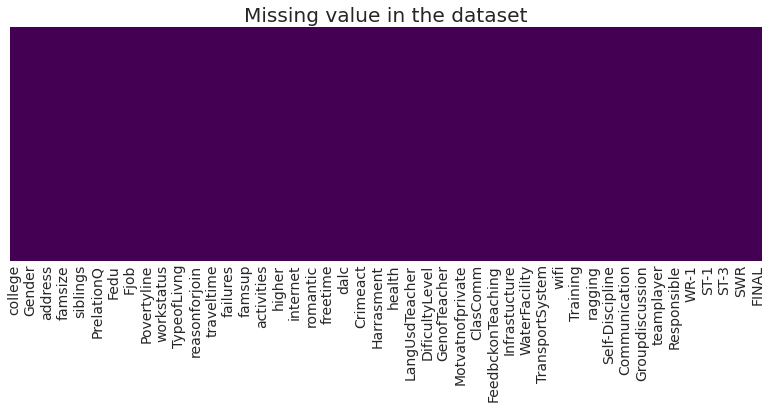

In [ ]:
plt.figure(figsize=(12,4))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset');

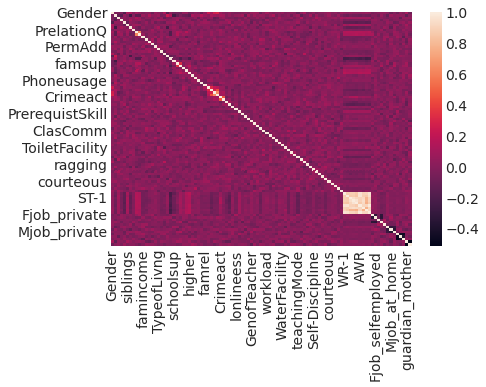

In [ ]:
corr = data.corr()
sns.heatmap(corr)

In [ ]:
from sklearn.model_selection import train_test_split
X = data[['ST-1', 'ST-2','studytime', 'failures', 'absences','AWR','SWR','ST-3','WR-1','WR-2']] #Independent variable 
y = data['FINAL'] #dependent variable 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
from sklearn.linear_model import LinearRegression 

lm = LinearRegression() 

In [ ]:
lm.fit(X_train,y_train) 

LinearRegression()

In [ ]:
print(lm.intercept_)

-0.1337562422505414


In [ ]:
predictions = lm.predict(X_test)  

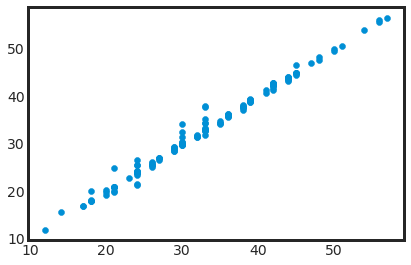

In [ ]:
plt.scatter(y_test,predictions)

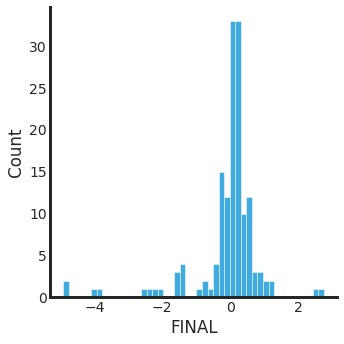

In [ ]:
sns.displot((y_test-predictions)); 

In [ ]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
from sklearn.metrics import r2_score
print(r2_score(y_test, predictions))

MAE: 0.5403104012005584
MSE: 0.9930045623487179
RMSE: 0.9964961426662513
0.9888330593638953


In [ ]:
from sklearn.model_selection import cross_val_score
mse=cross_val_score(lm,X,y,scoring='neg_mean_squared_error',cv=5)
mean_mse=np.mean(mse)
print(mean_mse)

-1.3258508442851766


In [ ]:
from sklearn.ensemble import RandomForestRegressor
random_regressor = RandomForestRegressor(n_estimators=10, random_state=0)
random_regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [ ]:
y_pred = random_regressor.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

0.9929914035235907


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X,y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 100}
-1.2219999924734801


In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(X,y)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.078e+02, tolerance: 4.153e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.548e+02, tolerance: 3.756e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

{'alpha': 0.01}
-1.316496985344609


In [ ]:

prediction_lasso=lasso_regressor.predict(X_test)
prediction_ridge=ridge_regressor.predict(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


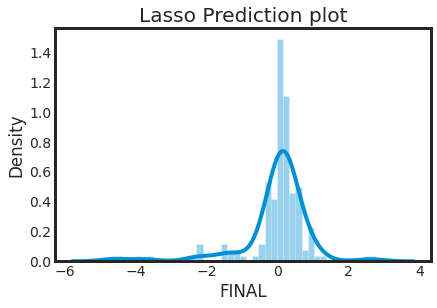

In [ ]:
import seaborn as sns

sns.distplot(y_test-prediction_lasso)
plt.title("Lasso Prediction plot")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


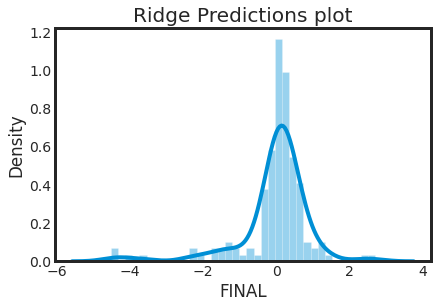

In [ ]:
import seaborn as sns

sns.distplot(y_test-prediction_ridge)
plt.title("Ridge Predictions plot")
plt.show()